In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [5]:
study_hr = [10, 12, 14, 7, 5]
score = [80, 90, 95, 50, 43]
df = pd.DataFrame({'study_hr':study_hr, 'score':score})
df

,study_hr,score
0,10,80
1,12,90
2,14,95
3,7,50
4,5,43


In [18]:
X = df['study_hr']
y = df['score']
print(' * shape of X:{} \n * shape of y:{}'.format(X.shape, y.shape))

 * shape of X:(5,) 
 * shape of y:(5,)


In [19]:
X

0    10
1    12
2    14
3     7
4     5
Name: study_hr, dtype: int64

In [20]:
y

0    80
1    90
2    95
3    50
4    43
Name: score, dtype: int64

In [24]:
X_reshaped = X.values.reshape(-1,1)
y_reshaped = y.values.reshape(-1,1)
print(' * shape of X_reshaped:{} \n * shape of y_reshaped:{}'.format(X_reshaped.shape, y_reshaped.shape))

 * shape of X_reshaped:(5, 1) 
 * shape of y_reshaped:(5, 1)


In [26]:
X_reshaped

array([[10],
       [12],
       [14],
       [ 7],
       [ 5]])

In [27]:
y_reshaped

array([[80],
       [90],
       [95],
       [50],
       [43]])

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()

In [31]:
lr.fit(X_reshaped, y_reshaped)

LinearRegression()

In [36]:
lr.score(X_reshaped, y_reshaped)

0.9593011396955713

In [39]:
lr.intercept_

array([10.57142857])

In [40]:
lr.coef_

array([[6.35714286]])

In [42]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [50]:
X_reshaped

array([[10],
       [12],
       [14],
       [ 7],
       [ 5]])

In [52]:
lr.predict([[13],])

array([[93.21428571]])

In [56]:
lr.predict([[13,],[11,]])

array([[93.21428571],
       [80.5       ]])

In [69]:
x = X
y_hat = lr.coef_[0] * x + lr.intercept_

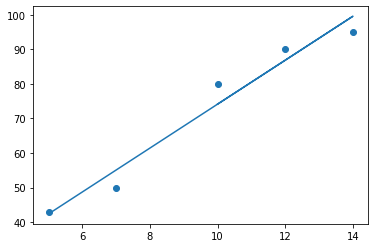

In [75]:
import matplotlib.pyplot as plt
plt.plot(x, y_hat)
plt.scatter(X, y)

#### mse & rmse (1)

In [107]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_hat)

18.2428571428571

In [108]:
mean_squared_error(y, y_hat, squared=True)

18.2428571428571

In [147]:
mean_squared_error(y, y_hat, squared=False)   # RMSE

4.271165782647297

#### mse & rmse (2)

In [77]:
residuals = y - y_hat
residuals

0    5.857143
1    3.142857
2   -4.571429
3   -5.071429
4    0.642857
dtype: float64

In [97]:
mse = sum(residuals**2)/len(residuals)
mse

18.2428571428571

In [98]:
rmse = np.sqrt(mse)
rmse

4.271165782647297

#### R Squared (1)

In [149]:
lr.score(X_reshaped, y_reshaped)

0.9593011396955713

#### R Squared (2)

In [103]:
from sklearn.metrics import r2_score
r2_score(y, y_hat)

0.9593011396955713

#### R Squared (3)

In [141]:
m = np.mean(y)
m

71.6

In [145]:
1 - float(sum((y - y_hat)**2) / sum((y - m)**2))

0.9593011396955713

#### R Squared (4)

In [162]:
df.corr()

,study_hr,score
study_hr,1.000000,0.979439
score,0.979439,1.000000


In [163]:
df.corr()**2

,study_hr,score
study_hr,1.000000,0.959301
score,0.959301,1.000000


In [ ]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


In [ ]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


In [ ]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

In [ ]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()


In [ ]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)
